# **COVID-19** Analysis Dashboard 

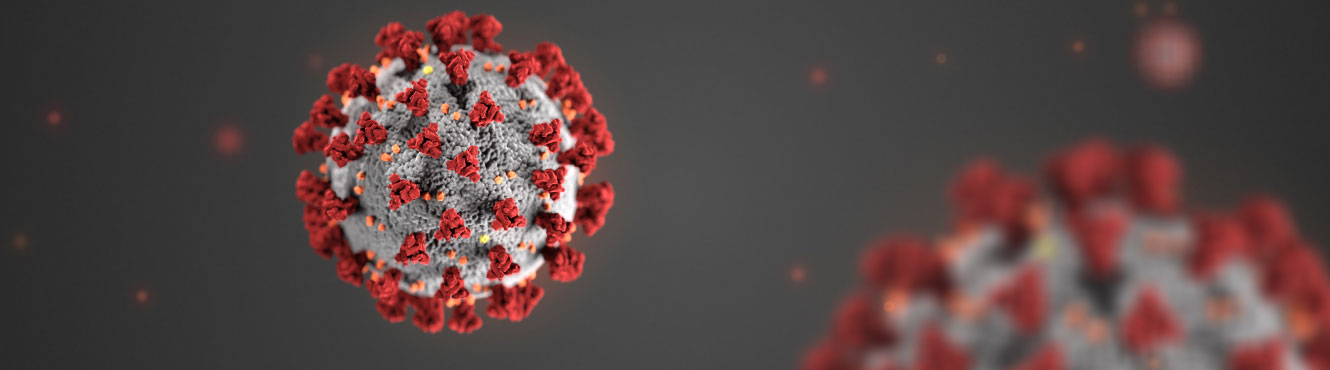

<a class="anchor" id="0.1"></a>
# **Table of Contents**
1.	[Data Dictionary](#1)
2.	[Exploratory data analysis](#2)
	-  [Reading the data ](#2.1)
    -  [Data Cleaning](#2.2)
    -  [Univariate Analysis](#2.3)
    -  [Missing Value Treatment](#2.4)
    -  [Outliers Treatment](#2.5)
    -  [Dummy Creation](#2.6)
    -  [Checking Correlation](#2.7)
3. [ModelDecvelopment](#3)
   - [Logistic Regression](#3.1)
      - [Confusion Metrics](#3.1.1)
   - [Decission Tree](#3.2)
   - [Random Forest](#3.3)

## Data Dictionary <a class="anchor" id="1"></a>
[Table of Contents](#0.1)
***
* **cdc_case_earliest_dt**: The earlier of the Clinical Date (date related to the illness or specimen collection) or the Date Received by CDC. Calculated date-- Cdc_case_earliest_dt uses the best available date from the set of dates related to illness/specimen collection and the set of dates related to when a case is reported. It is an option to end-users who need a date variable with optimized completeness. The logic of cdc_case_earliest_dt is to use the non-null date of one variable when the other is null and to use the earliest valid date when both dates are available. If no date available, then left blank.
***
* **cdc_report_dt**: Date case was first reported to the CDC. Calculated date-- Depreciated; CDC recommends researchers use cdc_case_earliest_dt in time series and other analyses. This date was populated using the date at which a case record was first submitted to the database. If missing, then the report date entered on the case report form was used. If missing, then the date at which the case first appeared in the database was used. If none available, then left blank.
*** 
* **pos_spec_dt**: Date of first positive specimen collection (Case Report Form)
***
* **onset_dt**:Symptom onset date, if symptomatic (Case Report Form)
***  
* **current_status**: Case Status (Case Report Form: What is the current status of this person?) -- Values: Laboratory-confirmed case; Probable case; Please see latest CSTE case definition for more information.
***
* **sex**: Sex (Case Report Form): Male; Female; Unknown; Other; Missing; NA
*** 
* **age_group**: Age Group: 0 - 9 Years; 10 - 19 Years; 20 - 39 Years; 40 - 49 Years; 50 - 59 Years; 60 - 69 Years; 70 - 79 Years; 80 + Years; Missing; NA; The age group categorizations were populated using the age value that was reported on the case report form. Date of birth was used to fill in missing/unknown age values using the difference in time between date of birth and onset date.
*** 
* **race_ethnicity_combined**: Race and ethnicity (combined): American Indian/Alaska Native, Non-Hispanic; Asian, Non-Hispanic; Black, Non-Hispanic; Multiple/Other, Non-Hispanic; Native Hawaiian/Other Pacific Islander, Non-Hispanic; White, Non-Hispanic; Hispanic/Latino; Unknown; Missing; NA. If more than race was reported, race was categorized into multiple/other races.
***
* **hosp_yn**: Hospitalization status (Case Report Form: Was the patient hospitalized?) -- Values: Yes; No; Unknown; Missing;
*** 
* **icu_yn**: ICU admission status (Case Report Form: Was the patient admitted to an intensive care unit (ICU)?) -- Values: Yes; No; Unknown; Missing;
*** 
* **death_yn**: Death status (Case Report Form: Did the patient die as a result of this illness?) -- Values: Yes; No; Unknown; Missing;
*** 
* **medcond_yn**: Presence of underlying comorbidity or disease (Case Report Form: Pre-existing medical conditions?) -- Values: Yes; No; Unknown; Missing;
***
                                                                                                                    * Tarun

### Exploratory data analysis <a class="anchor" id="2"></a>
[Table of Contents](#0.1)

### Reading the data <a class="anchor" id="2.1"></a>
[Table of Contents](#0.1)

In [67]:
# importing important Libraries
import os                             
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
os.chdir("Downloads")     # changing the directory

In [150]:
df=pd.read_csv('covid20_sample.csv') # reading the covid file and save in df

In [151]:
df

,Unnamed: 0,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
0,3517780,2020/07/22,NaN,NaN,Laboratory-confirmed case,Female,70 - 79 Years,"White, Non-Hispanic",Yes,Missing,Yes,Missing
1,3679793,2020/08/07,2020/08/04,NaN,Laboratory-confirmed case,Female,80+ Years,"White, Non-Hispanic",Yes,Unknown,Yes,Missing
2,3331587,2020/03/31,NaN,NaN,Laboratory-confirmed case,Male,70 - 79 Years,"White, Non-Hispanic",Yes,No,Yes,Yes
3,3680266,2020/08/11,2020/08/05,NaN,Laboratory-confirmed case,Female,80+ Years,"Black, Non-Hispanic",Yes,Unknown,Yes,Yes
4,6264234,2020/04/18,NaN,NaN,Probable Case,Female,50 - 59 Years,"Asian, Non-Hispanic",Unknown,Unknown,Yes,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
184150,5626192,2020/09/10,NaN,2020/08/16,Laboratory-confirmed case,Male,10 - 19 Years,"White, Non-Hispanic",No,Missing,No,Missing
184151,4102370,2020/06/26,NaN,2020/06/15,Laboratory-confirmed case,Male,60 - 69 Years,Hispanic/Latino,No,Missing,No,Missing
184152,4832402,2020/08/03,2020/08/04,2020/08/03,Laboratory-confirmed case,Male,50 - 59 Years,"Asian, Non-Hispanic",No,Unknown,No,Unknown
184153,3590011,2020/05/27,NaN,NaN,Laboratory-confirmed case,Male,70 - 79 Years,Unknown,Unknown,Unknown,No,Unknown


In [152]:
df.shape

(184155, 12)

The data has 184155 rows and 12 columns

## Data Cleaning <a class="anchor" id="2.2"></a>
[Table of Contents](#0.1)

In [153]:
df.isnull().sum()

Unnamed: 0                            0
cdc_report_dt                         0
pos_spec_dt                      117011
onset_dt                          65710
current_status                        0
sex                                   1
age_group                             4
Race and ethnicity (combined)         1
hosp_yn                               0
icu_yn                                0
death_yn                              0
medcond_yn                            0
dtype: int64

* There are null values in **pos_spec_dt**, **onset_dt**, **sex age_group** and **Race_ethnicity**

In [154]:
df["medcond_yn"].value_counts()

Missing    101496
Yes         42408
Unknown     21830
No          18421
Name: medcond_yn, dtype: int64

we can combine missing and Unknown

In [155]:
df["medcond_yn"]=df["medcond_yn"].replace(["Missing"],"Unknown")

In [156]:
df["medcond_yn"].value_counts()

Unknown    123326
Yes         42408
No          18421
Name: medcond_yn, dtype: int64

In [157]:
df["death_yn"].value_counts(normalize=True)

No     0.601254
Yes    0.398746
Name: death_yn, dtype: float64

In [158]:
df['death_yn']=df['death_yn'].map({'Yes':1,'No':0})

In [159]:
df["icu_yn"].value_counts(dropna=False)     #same missing and unknown combine

Missing    103731
Unknown     42300
No          27584
Yes         10540
Name: icu_yn, dtype: int64

In [160]:
df["icu_yn"]=df["icu_yn"].replace(["Missing"],"Unknown")

In [161]:
df["icu_yn"].value_counts(dropna=False)

Unknown    146031
No          27584
Yes         10540
Name: icu_yn, dtype: int64

In [162]:
df["hosp_yn"].value_counts(dropna=False)#we are gonna do same combine missing and unknown 

No         91217
Yes        53384
Unknown    20043
Missing    19511
Name: hosp_yn, dtype: int64

In [163]:
df["hosp_yn"]=df["hosp_yn"].replace(["Missing"],"Unknown")

In [164]:
df["hosp_yn"].value_counts(dropna=False)

No         91217
Yes        53384
Unknown    39554
Name: hosp_yn, dtype: int64

In [169]:
df["Race_ethnicity"].value_counts(dropna=False)

White, Non-Hispanic                                     75938
Unknown                                                 39585
Hispanic/Latino                                         26330
Black, Non-Hispanic                                     22485
Multiple/Other, Non-Hispanic                             6902
Missing                                                  6789
Asian, Non-Hispanic                                      4581
American Indian/Alaska Native, Non-Hispanic              1100
Native Hawaiian/Other Pacific Islander, Non-Hispanic      444
NaN                                                         1
Name: Race_ethnicity, dtype: int64

In [166]:
df.rename(columns={"Race and ethnicity (combined)":"Race_ethnicity"},inplace=True)

Changing The Name of column

In [170]:
df["Race_ethnicity"]=df["Race_ethnicity"].replace([np.nan,"Missing"],"Unknown")

replacing **nan value** and **Missing** with Unknown

In [171]:
df["Race_ethnicity"].value_counts(dropna=False)

White, Non-Hispanic                                     75938
Unknown                                                 46375
Hispanic/Latino                                         26330
Black, Non-Hispanic                                     22485
Multiple/Other, Non-Hispanic                             6902
Asian, Non-Hispanic                                      4581
American Indian/Alaska Native, Non-Hispanic              1100
Native Hawaiian/Other Pacific Islander, Non-Hispanic      444
Name: Race_ethnicity, dtype: int64

In [172]:
df1=pd.get_dummies(data=df,columns=["Race_ethnicity"],drop_first=True)

In [173]:
df1.columns=df1.columns.str.replace(" ","_")
df1.columns=df1.columns.str.replace("-","_")
df1.columns=df1.columns.str.replace(",","_")
df1.columns=df1.columns.str.replace("/","_")

In [174]:
df1.columns

Index(['Unnamed:_0', 'cdc_report_dt', 'pos_spec_dt', 'onset_dt',
       'current_status', 'sex', 'age_group', 'hosp_yn', 'icu_yn', 'death_yn',
       'medcond_yn', 'Race_ethnicity_Asian__Non_Hispanic',
       'Race_ethnicity_Black__Non_Hispanic', 'Race_ethnicity_Hispanic_Latino',
       'Race_ethnicity_Multiple_Other__Non_Hispanic',
       'Race_ethnicity_Native_Hawaiian_Other_Pacific_Islander__Non_Hispanic',
       'Race_ethnicity_Unknown', 'Race_ethnicity_White__Non_Hispanic'],
      dtype='object')

In [175]:
df1["age_group"].value_counts(dropna=False)

80+ Years        37917
70 - 79 Years    24085
60 - 69 Years    23112
20 - 29 Years    22170
50 - 59 Years    21916
30 - 39 Years    19374
40 - 49 Years    19255
10 - 19 Years    11770
0 - 9 Years       4413
Unknown            139
NaN                  4
Name: age_group, dtype: int64

In [182]:
df1['age_group']=df['age_group'].map({'0 - 9 Years':'0 - 19 Years',
                                       '10 - 19 Years':'0 - 19 Years',
                                       '20 - 29 Years':'20 - 39 Years',
                                       '30 - 39 Years':'20 - 39 Years',
                                       '40 - 49 Years':'40 - 59 Years',
                                       '50 - 59 Years':'40 - 59 Years',
                                       '60 - 69 Years':'60+ Years',
                                       '70 - 79 Years':'60+ Years',
                                       '80+ Years':'60+ Years',
                                       'Unknown':'Unknown',
                                         np.nan:"Unknown"})

In [183]:
df1["age_group"].value_counts(dropna=False)

60+ Years        85114
20 - 39 Years    41544
40 - 59 Years    41171
0 - 19 Years     16183
Unknown            143
Name: age_group, dtype: int64

In [184]:
df1['age_group'].value_counts()

60+ Years        85114
20 - 39 Years    41544
40 - 59 Years    41171
0 - 19 Years     16183
Unknown            143
Name: age_group, dtype: int64

In [185]:
df1["sex"].value_counts(dropna=False)

Female     92108
Male       91269
Unknown      537
Missing      238
Other          2
NaN            1
Name: sex, dtype: int64

In [186]:
df1['sex']=df1['sex'].replace([np.nan,'Missing','Other'],'Unknown')

In [187]:
df1["sex"].value_counts(dropna=False)

Female     92108
Male       91269
Unknown      778
Name: sex, dtype: int64

In [188]:
df1["pos_spec_dt"].value_counts(dropna=False)

NaN           117011
2020/11/09       834
2020/04/07       723
2020/04/06       709
2020/11/10       666
               ...  
2020/11/30         1
2020/03/01         1
2020/01/03         1
2020/01/22         1
2020/11/26         1
Name: pos_spec_dt, Length: 279, dtype: int64

In [189]:
df1.drop(columns=['pos_spec_dt','onset_dt'],inplace=True)

In [190]:
df1.columns

Index(['Unnamed:_0', 'cdc_report_dt', 'current_status', 'sex', 'age_group',
       'hosp_yn', 'icu_yn', 'death_yn', 'medcond_yn',
       'Race_ethnicity_Asian__Non_Hispanic',
       'Race_ethnicity_Black__Non_Hispanic', 'Race_ethnicity_Hispanic_Latino',
       'Race_ethnicity_Multiple_Other__Non_Hispanic',
       'Race_ethnicity_Native_Hawaiian_Other_Pacific_Islander__Non_Hispanic',
       'Race_ethnicity_Unknown', 'Race_ethnicity_White__Non_Hispanic'],
      dtype='object')

In [191]:
df1.dtypes

Unnamed:_0                                                              int64
cdc_report_dt                                                          object
current_status                                                         object
sex                                                                    object
age_group                                                              object
hosp_yn                                                                object
icu_yn                                                                 object
death_yn                                                                int64
medcond_yn                                                             object
Race_ethnicity_Asian__Non_Hispanic                                      uint8
Race_ethnicity_Black__Non_Hispanic                                      uint8
Race_ethnicity_Hispanic_Latino                                          uint8
Race_ethnicity_Multiple_Other__Non_Hispanic                     

In [192]:

df1["current_status"].value_counts(dropna=False)


Laboratory-confirmed case    173359
Probable Case                 10796
Name: current_status, dtype: int64

In [193]:
df1["current_status"]=df1["current_status"].replace("Laboratory-confirmed case","Laboratory_confirmed_case")
df1["current_status"]=df1["current_status"].replace("Probable Case","Probable_Case")

In [194]:
df1["current_status"].value_counts(dropna=False)


Laboratory_confirmed_case    173359
Probable_Case                 10796
Name: current_status, dtype: int64

In [195]:
df["cdc_report_dt"]

0         2020/07/22
1         2020/08/07
2         2020/03/31
3         2020/08/11
4         2020/04/18
             ...    
184150    2020/09/10
184151    2020/06/26
184152    2020/08/03
184153    2020/05/27
184154    2020/08/14
Name: cdc_report_dt, Length: 184155, dtype: object

In [196]:
# it is function to convert into date time format but if you find it difficult to undestand just dm me i will explain
def date_format(data, x:str):
    x_type=data[x].dtype
    if isinstance(x_type, pd.core.dtypes.dtypes.DatetimeTZDtype):
        x_type=np.datetime64
    if not np.issubdtype(x_type,np.datetime64):
        data[x]=pd.to_datetime(data[x], infer_datetime_format=True)

In [197]:
date_format(data=df1,x='cdc_report_dt')

In [198]:
df1["cdc_report_dt"].dtypes

dtype('<M8[ns]')

In [199]:
df1["month"]=df1["cdc_report_dt"].dt.month
df1["week_of_day"]=df1["cdc_report_dt"].dt.dayofweek
df1["day"]=df1["cdc_report_dt"].dt.day


In [200]:
df1["month"].value_counts()

6     27973
10    25274
11    24463
7     22130
4     21744
8     20218
9     19368
5     17499
3      5446
2        31
1         9
Name: month, dtype: int64

In [201]:
df1["is_weekend"]=np.where(df1["week_of_day"].isin([5,6]),1,0)

It will 1 for weekend and 0 for weekday

In [202]:
df1["is_weekend"].value_counts()

0    140558
1     43597
Name: is_weekend, dtype: int64

In [203]:
df1["month"]

0         7
1         8
2         3
3         8
4         4
         ..
184150    9
184151    6
184152    8
184153    5
184154    8
Name: month, Length: 184155, dtype: int64

In [204]:
df1["month"]=df1["month"].replace([1, 2,3],"First-quarter")
df1["month"]=df1["month"].replace([4, 5,6],"Second-quarter")
df1["month"]=df1["month"].replace([7, 8,9],"Third-quarter")
df1["month"]=df1["month"].replace([10,11, 12],"Fourth-quarter")

In [205]:
df1["month"].value_counts()

Second-quarter    67216
Third-quarter     61716
Fourth-quarter    49737
First-quarter      5486
Name: month, dtype: int64

In [206]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184155 entries, 0 to 184154
Data columns (total 20 columns):
 #   Column                                                               Non-Null Count   Dtype         
---  ------                                                               --------------   -----         
 0   Unnamed:_0                                                           184155 non-null  int64         
 1   cdc_report_dt                                                        184155 non-null  datetime64[ns]
 2   current_status                                                       184155 non-null  object        
 3   sex                                                                  184155 non-null  object        
 4   age_group                                                            184155 non-null  object        
 5   hosp_yn                                                              184155 non-null  object        
 6   icu_yn                              

## Univariate Analysis<a class="anchor" id="2.3"></a>
[Table of Contents](#0.1)

In [207]:
# created a function specially only for categorical columns
def univariate_cat(data,x): 
    missing=data[x].isnull().sum() 
    unique_cnt=data[x].nunique() 
    unique_cat=list(data[x].unique()) 
    f1=pd.DataFrame(data[x].value_counts()) 
    f1.rename(columns={x:'count'},inplace=True) 
    f2=pd.DataFrame(data[x].value_counts(normalize=True)) 
    f2.rename(columns={x:'percentage'},inplace=True) 
    f2['percentage']=(f2['percentage']*100).round(2).astype(str)+'%' 
    ff=pd.concat([f1,f2],axis=1) 
    print(f"Total missing values : {missing}\n") 
    print(f"Total count of unique categories: {unique_cnt}\n") 
    print(f"Unique categories :\n{unique_cat}") 
    print(f'Value count and %\n:',ff)
    sns.countplot(data=data,x=x)
    plt.show()

In [208]:
df1.dtypes[df1.dtypes=="object"].index

Index(['current_status', 'sex', 'age_group', 'hosp_yn', 'icu_yn', 'medcond_yn',
       'month'],
      dtype='object')

In [209]:
df1.dtypes[df1.dtypes!="object"].index

Index(['Unnamed:_0', 'cdc_report_dt', 'death_yn',
       'Race_ethnicity_Asian__Non_Hispanic',
       'Race_ethnicity_Black__Non_Hispanic', 'Race_ethnicity_Hispanic_Latino',
       'Race_ethnicity_Multiple_Other__Non_Hispanic',
       'Race_ethnicity_Native_Hawaiian_Other_Pacific_Islander__Non_Hispanic',
       'Race_ethnicity_Unknown', 'Race_ethnicity_White__Non_Hispanic',
       'week_of_day', 'day', 'is_weekend'],
      dtype='object')

In [210]:
df1.drop(columns=["Unnamed:_0"],inplace=True)
df1.drop(columns=["cdc_report_dt"],inplace=True)

Total missing values : 0

Total count of unique categories: 3

Unique categories :
['Unknown', 'No', 'Yes']
Value count and %
:           count percentage
Unknown  146031      79.3%
No        27584     14.98%
Yes       10540      5.72%


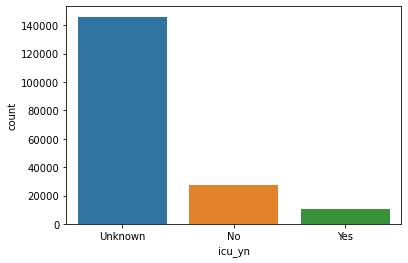

In [212]:
univariate_cat(df,'icu_yn')

Total missing values : 0

Total count of unique categories: 2

Unique categories :
[1, 0]
Value count and %
:     count percentage
0  110724     60.13%
1   73431     39.87%


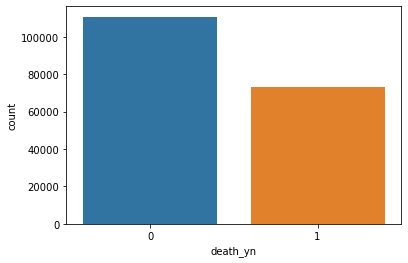

In [213]:
univariate_cat(df1,'death_yn')

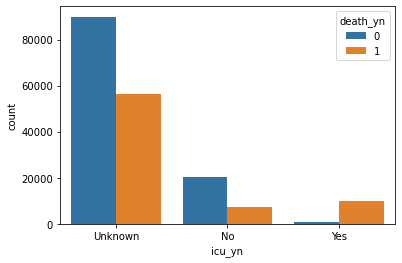

In [214]:
sns.countplot(data=df1,x='icu_yn',hue='death_yn')
plt.show()

### Missing Value Treatment <a class="anchor" id="2.4"></a>
[Table of Contents](#0.1)

In [215]:
df1.isnull().sum()

current_status                                                         0
sex                                                                    0
age_group                                                              0
hosp_yn                                                                0
icu_yn                                                                 0
death_yn                                                               0
medcond_yn                                                             0
Race_ethnicity_Asian__Non_Hispanic                                     0
Race_ethnicity_Black__Non_Hispanic                                     0
Race_ethnicity_Hispanic_Latino                                         0
Race_ethnicity_Multiple_Other__Non_Hispanic                            0
Race_ethnicity_Native_Hawaiian_Other_Pacific_Islander__Non_Hispanic    0
Race_ethnicity_Unknown                                                 0
Race_ethnicity_White__Non_Hispanic                 

##### There are No Missing Values Left To Treat

# Outliers Treatment<a class="anchor" id="2.5"></a>
[Table of Contents](#0.1)

In [216]:
df1.describe(percentiles=[.01,.02,.03,.04,.05,.25,.75,.9,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
death_yn,184155.0,0.398746,0.489642,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Race_ethnicity_Asian__Non_Hispanic,184155.0,0.024876,0.155747,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
Race_ethnicity_Black__Non_Hispanic,184155.0,0.122098,0.327400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Race_ethnicity_Hispanic_Latino,184155.0,0.142977,0.350051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Race_ethnicity_Multiple_Other__Non_Hispanic,184155.0,0.037479,0.189934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
Race_ethnicity_Native_Hawaiian_Other_Pacific_Islander__Non_Hispanic,184155.0,0.002411,0.049043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Race_ethnicity_Unknown,184155.0,0.251826,0.434063,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Race_ethnicity_White__Non_Hispanic,184155.0,0.412359,0.492260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
week_of_day,184155.0,2.738812,1.948675,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,4.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
day,184155.0,15.744965,8.478379,1.0,1.0,1.0,2.0,2.0,2.0,9.0,16.0,23.0,28.0,29.0,30.0,30.0,30.0,31.0,31.0


In [217]:
df1.dtypes[df1.dtypes=='object']

current_status    object
sex               object
age_group         object
hosp_yn           object
icu_yn            object
medcond_yn        object
month             object
dtype: object

### Dummy Creation<a class="anchor" id="2.6"></a>
[Table of Contents](#0.1)

In [218]:
df2=pd.get_dummies(data=df1, drop_first=True)

In [219]:
df2.columns

Index(['death_yn', 'Race_ethnicity_Asian__Non_Hispanic',
       'Race_ethnicity_Black__Non_Hispanic', 'Race_ethnicity_Hispanic_Latino',
       'Race_ethnicity_Multiple_Other__Non_Hispanic',
       'Race_ethnicity_Native_Hawaiian_Other_Pacific_Islander__Non_Hispanic',
       'Race_ethnicity_Unknown', 'Race_ethnicity_White__Non_Hispanic',
       'week_of_day', 'day', 'is_weekend', 'current_status_Probable_Case',
       'sex_Male', 'sex_Unknown', 'age_group_20 - 39 Years',
       'age_group_40 - 59 Years', 'age_group_60+ Years', 'age_group_Unknown',
       'hosp_yn_Unknown', 'hosp_yn_Yes', 'icu_yn_Unknown', 'icu_yn_Yes',
       'medcond_yn_Unknown', 'medcond_yn_Yes', 'month_Fourth-quarter',
       'month_Second-quarter', 'month_Third-quarter'],
      dtype='object')

In [220]:
df2.columns=df2.columns.str.replace("[-, /]",'_') # here we are replacing -,/ with _

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11872\3613053414.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df2.columns=df2.columns.str.replace("[-, /]",'_')


In [221]:
df2.columns

Index(['death_yn', 'Race_ethnicity_Asian__Non_Hispanic',
       'Race_ethnicity_Black__Non_Hispanic', 'Race_ethnicity_Hispanic_Latino',
       'Race_ethnicity_Multiple_Other__Non_Hispanic',
       'Race_ethnicity_Native_Hawaiian_Other_Pacific_Islander__Non_Hispanic',
       'Race_ethnicity_Unknown', 'Race_ethnicity_White__Non_Hispanic',
       'week_of_day', 'day', 'is_weekend', 'current_status_Probable_Case',
       'sex_Male', 'sex_Unknown', 'age_group_20___39_Years',
       'age_group_40___59_Years', 'age_group_60+_Years', 'age_group_Unknown',
       'hosp_yn_Unknown', 'hosp_yn_Yes', 'icu_yn_Unknown', 'icu_yn_Yes',
       'medcond_yn_Unknown', 'medcond_yn_Yes', 'month_Fourth_quarter',
       'month_Second_quarter', 'month_Third_quarter'],
      dtype='object')

In [222]:
df2.shape      # The shape of data changed

(184155, 27)

#### Checking Correlation<a class="anchor" id="2.7"></a>
[Table of Contents](#0.1)


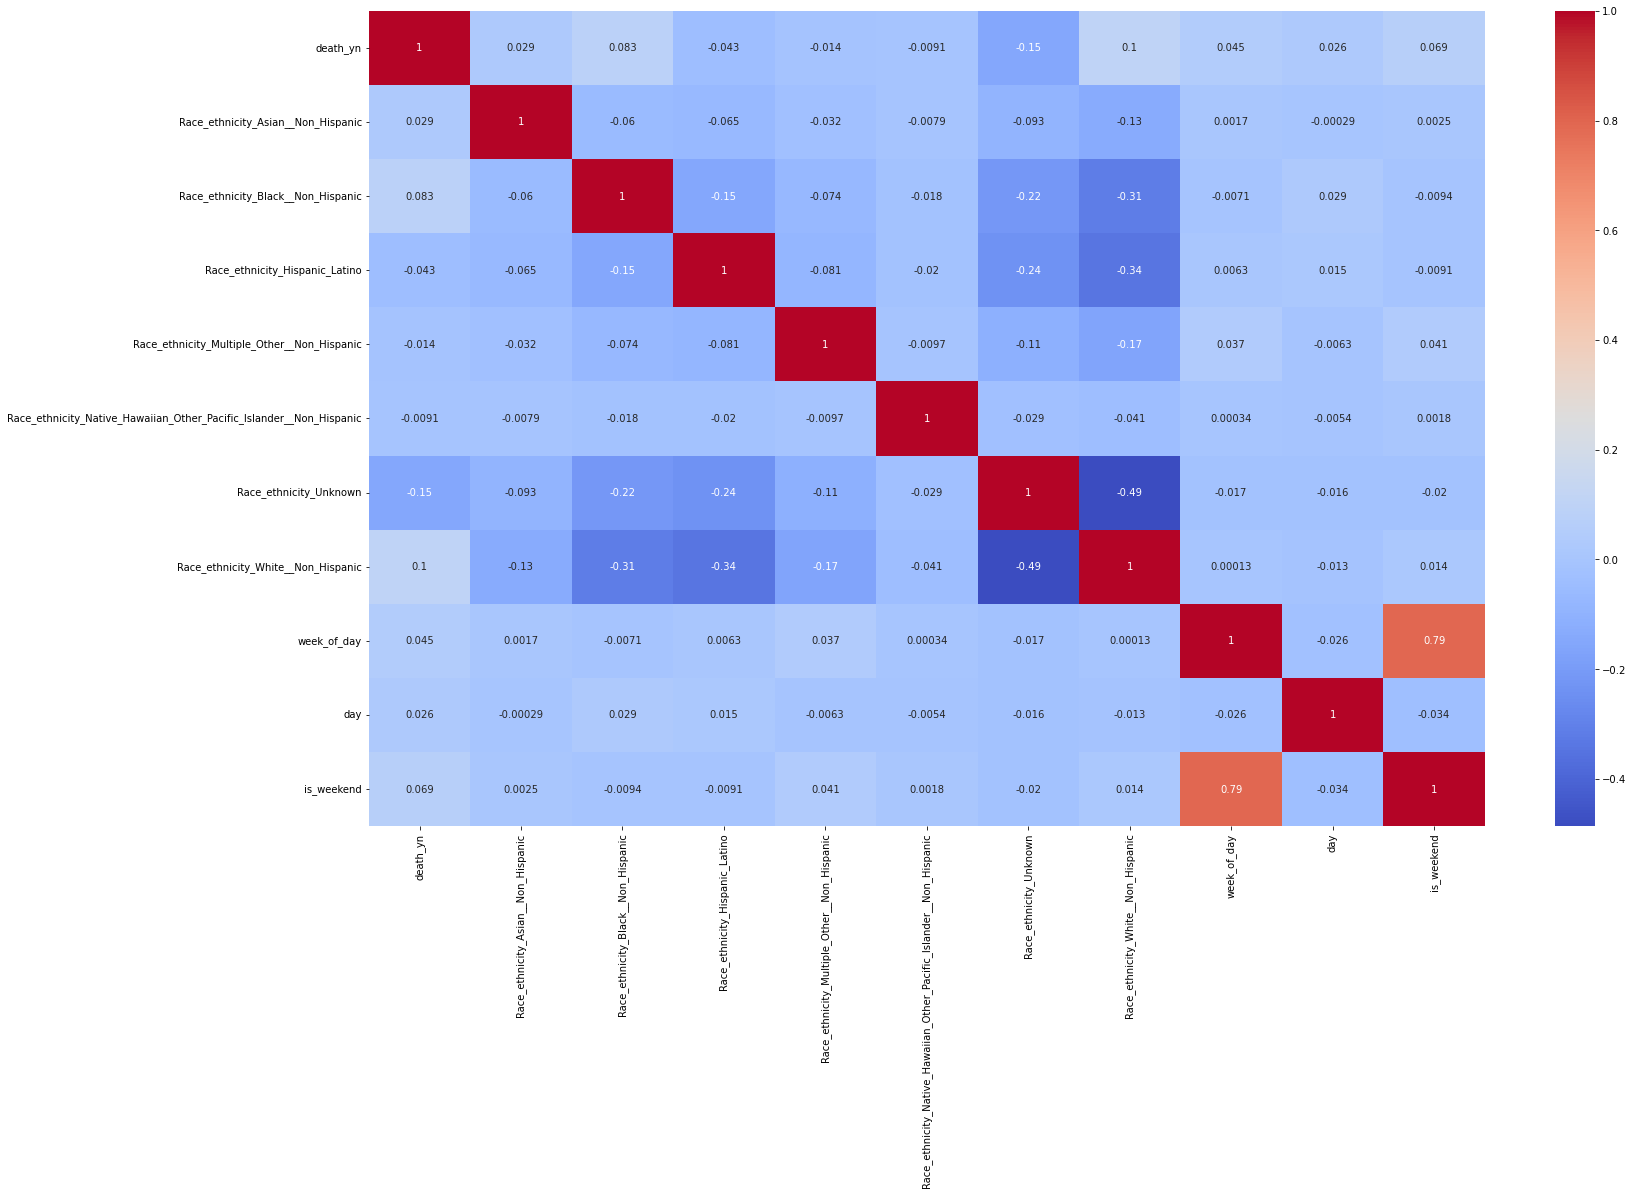

In [223]:
plt.figure(figsize=(25,15))
cr=df1.corr()                             # to check the corrrelation between columns and features
sns.heatmap(data=cr, annot=True, cmap='coolwarm')
plt.show() 

## Model Development<a class="anchor" id="3"></a>
[Table of Contents](#0.1)

In [225]:
y=df2["death_yn"]
x=df2.drop(columns=["death_yn"])

In [226]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=0)

### Logistic Regression<a class="anchor" id="3.1"></a>
[Table of Contents](#0.1)

In [227]:
logr=LogisticRegression(max_iter=1000)
logr.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [228]:
print("Train Score",logr.score(x_train,y_train))
print("Test Score",logr.score(x_test,y_test))

Train Score 0.8848793767557706
Test Score 0.8844892373856947


In [229]:
pred_train=logr.predict(x_train)
pred_test=logr.predict(x_test)

## Confusion Metrics<a class="anchor" id="3.1.1"></a>
[Table of Contents](#0.1)

In [230]:
conf_train=metrics.confusion_matrix(y_train,pred_train)

In [231]:
pd.DataFrame(conf_train, columns=['Pred_0_neg','Pred_1_pos'], index=['Act_0_neg','Act_1_pos'])

,Pred_0_neg,Pred_1_pos
Act_0_neg,74564,8271
Act_1_pos,7629,47652


In [232]:
print(metrics.classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90     82835
           1       0.85      0.86      0.86     55281

    accuracy                           0.88    138116
   macro avg       0.88      0.88      0.88    138116
weighted avg       0.89      0.88      0.88    138116



In [233]:
prob_train=logr.predict_proba(x_train)[:,1]
prob_test=logr.predict_proba(x_test)[:,1]

In [234]:
prob_train

array([0.46583844, 0.01041904, 0.00181433, ..., 0.0061544 , 0.22395014,
       0.92332554])

In [235]:
def classification_eva(act,pred,probs):
    act1=metrics.accuracy_score(act,pred)
    rc1=metrics.recall_score(act,pred)
    pc1=metrics.precision_score(act,pred)
    f1=metrics.f1_score(act,pred)
    auc1=metrics.roc_auc_score(act,pred)
    result={"Accuracy":act1,"Recall":rc1,"Precision":pc1,"F1 score":f1,"AUC":auc1}
    
    fpr,tpr,threshold=metrics.roc_curve(act,probs)
    plt.plot([0,1],[0,1],"k--")
    plt.plot(fpr,tpr)
    plt.xlabel("fpr")
    plt.ylabel("tpr")
    plt.show()
    return result
    

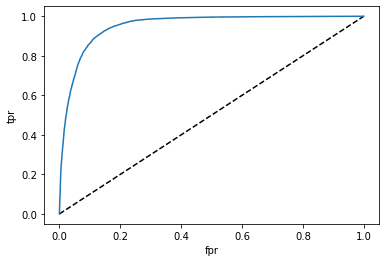

{'Accuracy': 0.8848793767557706,
 'Recall': 0.8619959841536875,
 'Precision': 0.8521002092162437,
 'F1 score': 0.8570195316715226,
 'AUC': 0.8810734432750089}

In [236]:
classification_eva(y_train,pred_train,prob_train)

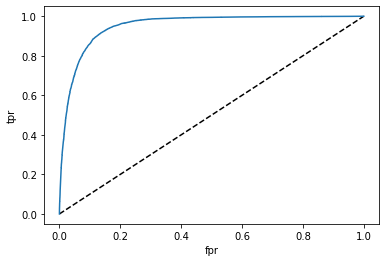

{'Accuracy': 0.8844892373856947,
 'Recall': 0.8615426997245179,
 'Precision': 0.8479015291183168,
 'F1 score': 0.854667686926104,
 'AUC': 0.8804827055939094}

In [237]:
classification_eva(y_test,pred_test,prob_test)

In [238]:
fpr, tpr, thresholds=metrics.roc_curve(y_train,pred_train)
roc_auc=metrics.auc(fpr,tpr)    # AUC : Area under the curve
roc_auc

0.8810734432750089

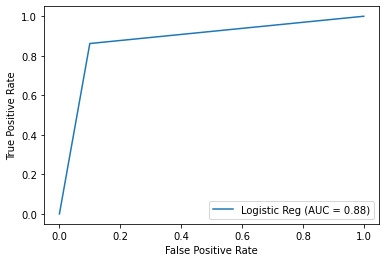

In [239]:
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc, estimator_name='Logistic Reg')
display.plot()
plt.show()

### Decission Tree<a class="anchor" id="3.2"></a>
[Table of Contents](#0.1)

In [240]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [241]:
print('Train Accuracy :',round(dt.score(x_train,y_train),2))
print('Test Accuracy :',round(dt.score(x_test,y_test),2))

Train Accuracy : 0.93
Test Accuracy : 0.87


In [97]:
from sklearn.model_selection import GridSearchCV

params={
    'criterion': ['gini','entropy'],
    'max_depth': [5,7,9,10,11],
    'min_samples_split': [10,15,20,50,100,200,250],
    'min_samples_leaf': [5,10,15,20,50,80,100]}

dtg=DecisionTreeClassifier()

gd_search=GridSearchCV(estimator=dtg, param_grid=params, cv=10, n_jobs=-1, verbose=2)

gd_search.fit(x_train, y_train)

Fitting 10 folds for each of 490 candidates, totalling 4900 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 7, 9, 10, 11],
                         'min_samples_leaf': [5, 10, 15, 20, 50, 80, 100],
                         'min_samples_split': [10, 15, 20, 50, 100, 200, 250]},
             verbose=2)

In [246]:
gd_search.best_params_

{'criterion': 'entropy',
 'max_depth': 11,
 'min_samples_leaf': 50,
 'min_samples_split': 10}

In [245]:
gd_search.best_score_

0.9090836444665262

In [100]:
gd_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf=50,
                       min_samples_split=10)

In [242]:
dt1=DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf=50,
                       min_samples_split=10)
dt1.fit(x_train,y_train)
print("Train_accuracy",dt1.score(x_train,y_train))
print("Test_accuracy",dt1.score(x_test,y_test))

Train_accuracy 0.8952691940108315
Test_accuracy 0.89189600121636


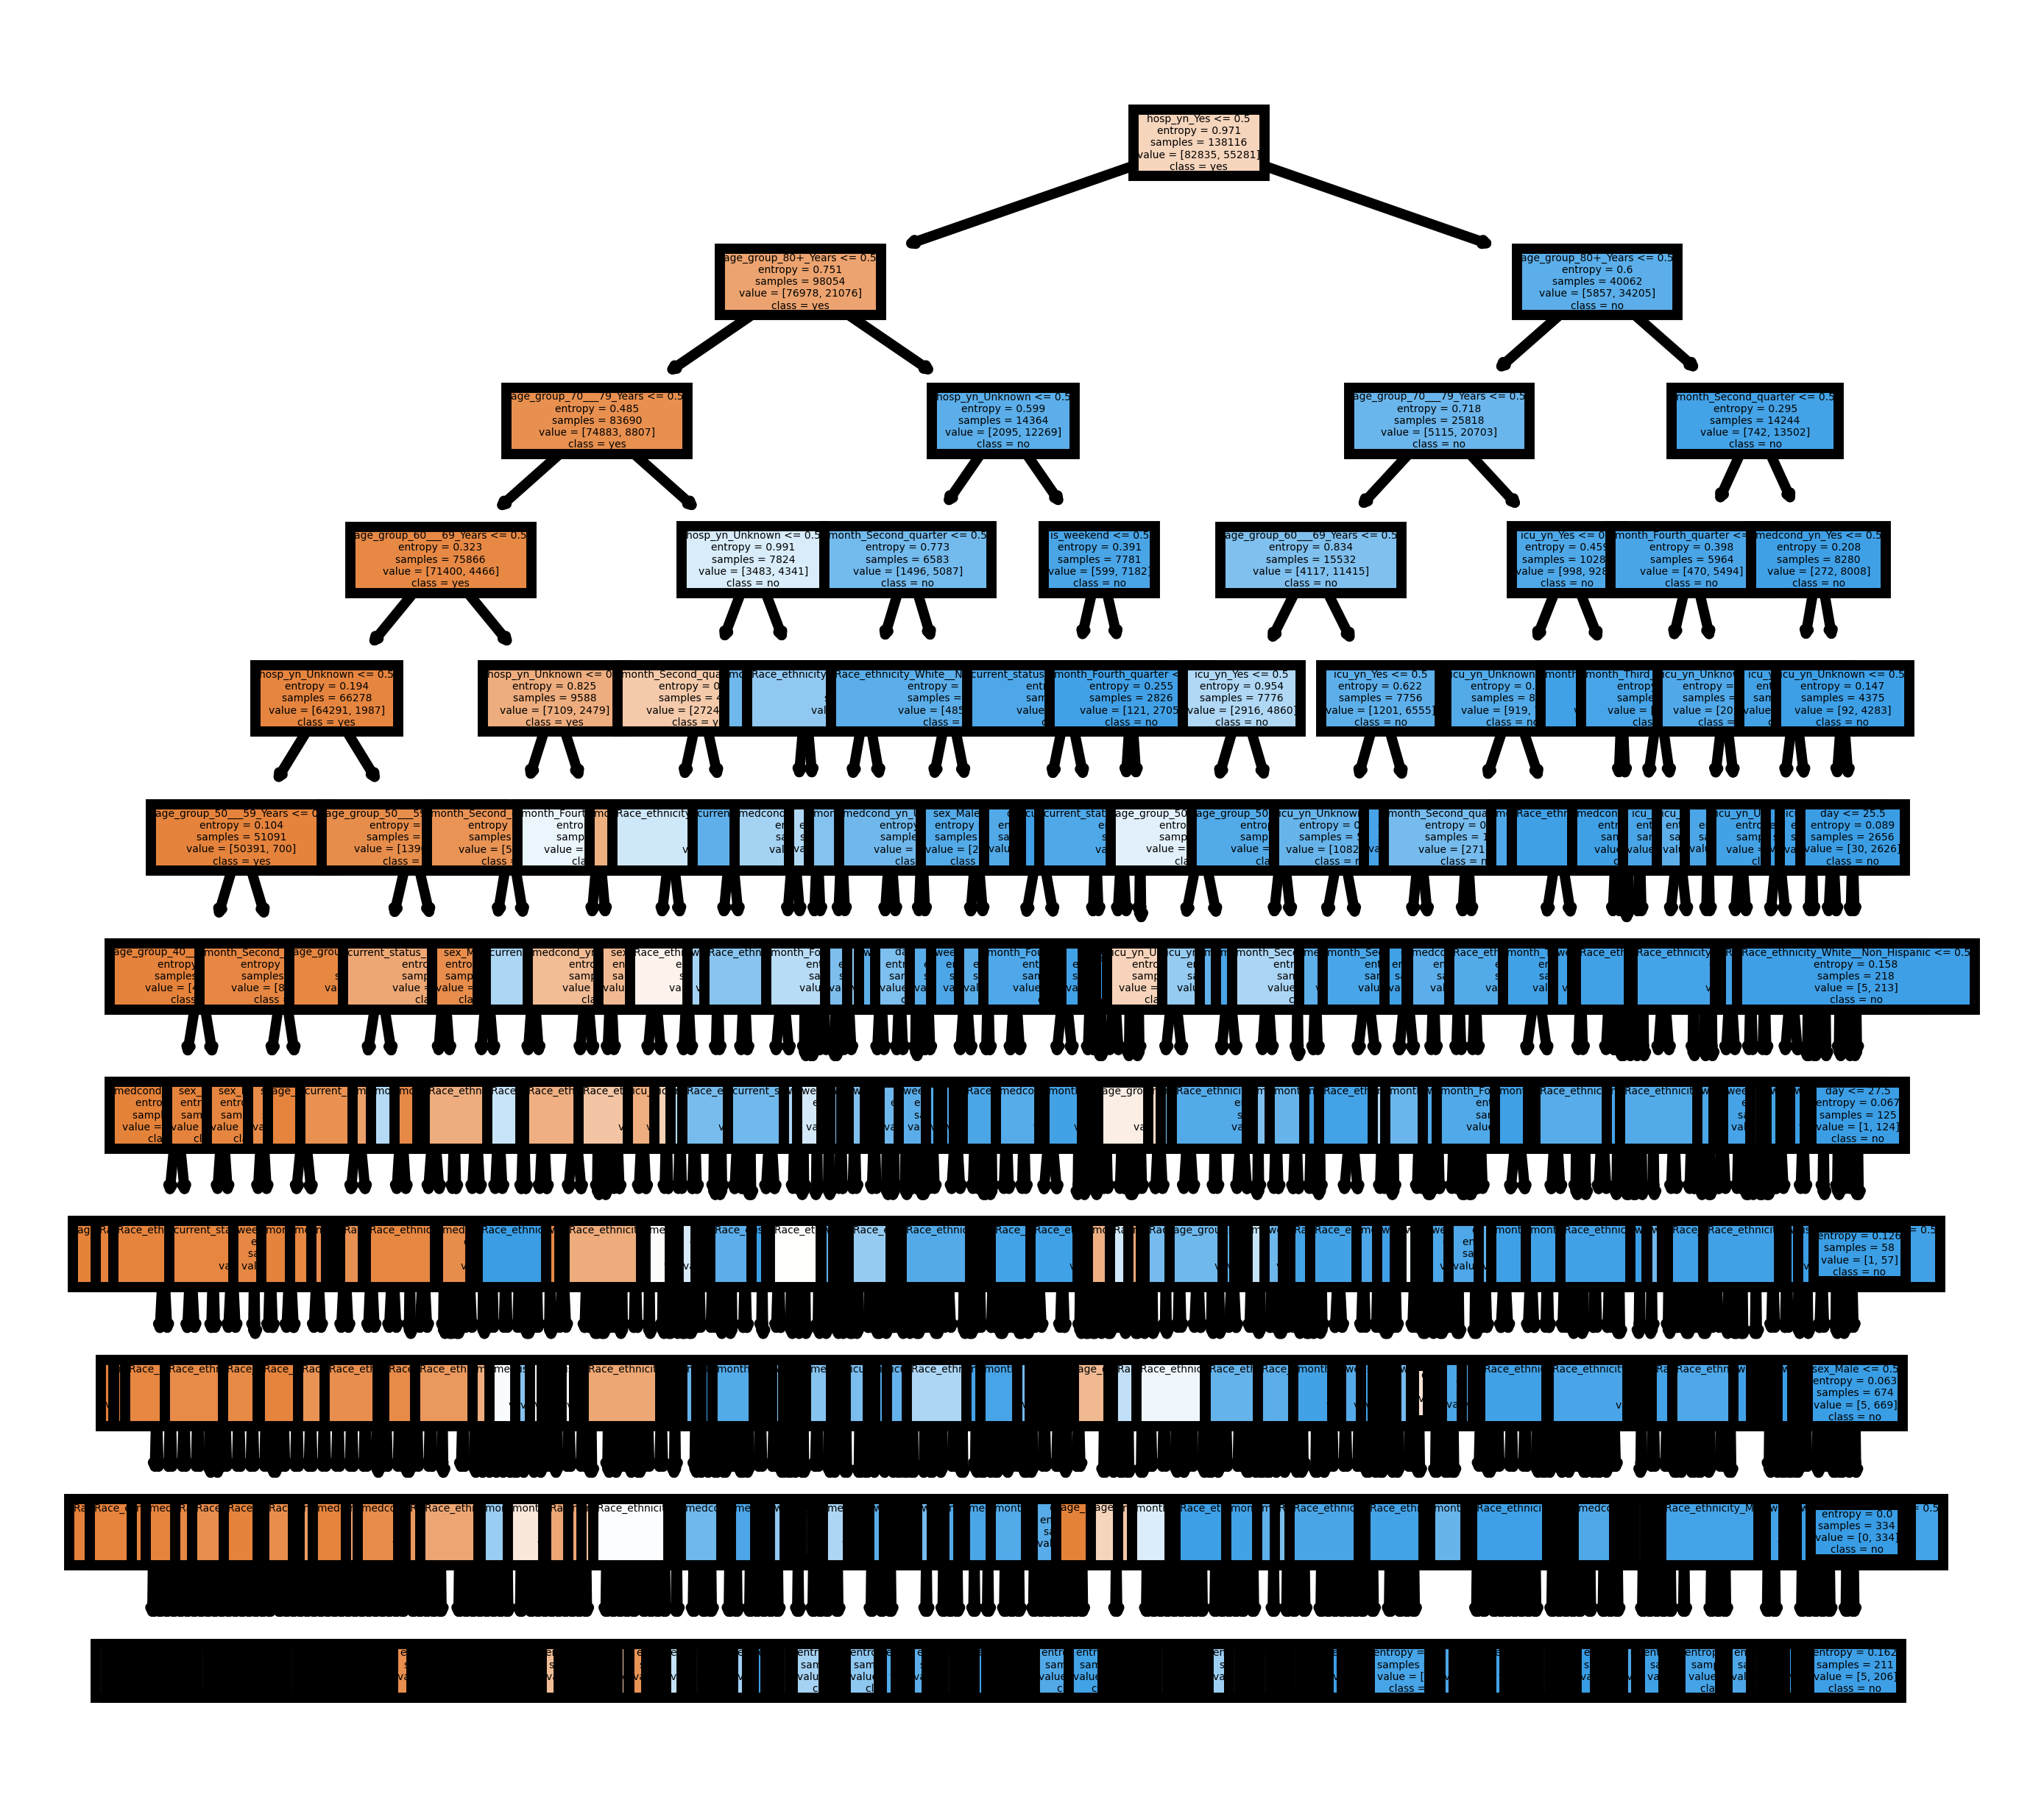

In [122]:
from sklearn.tree import plot_tree
fn=x_train.columns
cn=["yes","no"]
# Setting dpi =300 to make image clearer than default
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(3,3),dpi=1000)
plot_tree(dt1,
           feature_names=fn,
           class_names=cn,
           filled=True);

In [248]:
pred_train_dt=dt1.predict(x_train)
pred_test_dt=dt1.predict(x_test)

In [249]:
prob_train_dt=dt1.predict_proba(x_train)[:,1]
prob_test_dt=dt1.predict_proba(x_test)[:,1]

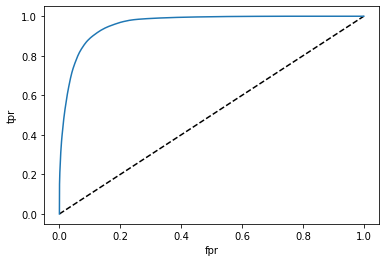

{'Accuracy': 0.8952691940108315,
 'Recall': 0.884752446591053,
 'Precision': 0.8580099642130377,
 'F1 score': 0.8711760252927817,
 'AUC': 0.8935200634597084}

In [250]:
classification_eva(y_train,pred_train_dt,prob_train_dt)

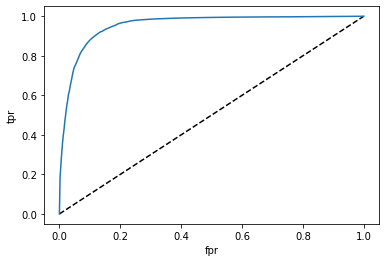

{'Accuracy': 0.89189600121636,
 'Recall': 0.8795592286501377,
 'Precision': 0.851186350306585,
 'F1 score': 0.8651402249017748,
 'AUC': 0.8897419650726754}

In [251]:
classification_eva(y_test,pred_test_dt,prob_test_dt)

In [254]:
import time

In [253]:
df2.columns

Index(['death_yn', 'Race_ethnicity_Asian__Non_Hispanic',
       'Race_ethnicity_Black__Non_Hispanic', 'Race_ethnicity_Hispanic_Latino',
       'Race_ethnicity_Multiple_Other__Non_Hispanic',
       'Race_ethnicity_Native_Hawaiian_Other_Pacific_Islander__Non_Hispanic',
       'Race_ethnicity_Unknown', 'Race_ethnicity_White__Non_Hispanic',
       'week_of_day', 'day', 'is_weekend', 'current_status_Probable_Case',
       'sex_Male', 'sex_Unknown', 'age_group_20___39_Years',
       'age_group_40___59_Years', 'age_group_60+_Years', 'age_group_Unknown',
       'hosp_yn_Unknown', 'hosp_yn_Yes', 'icu_yn_Unknown', 'icu_yn_Yes',
       'medcond_yn_Unknown', 'medcond_yn_Yes', 'month_Fourth_quarter',
       'month_Second_quarter', 'month_Third_quarter'],
      dtype='object')

# Random Forest<a class="anchor" id="3.3"></a>
[Table of Contents](#0.1)

In [1]:
tic=time.time()
params={"n_estimators":[100,150,200],
        "criterion":['gini',"entropy"],
        "max_depth":[7,9,11,15],
        "min_samples_split":[50,100,200],
        "min_samples_leaf":[5,10,15,20],
        "max_features":["sqrt","log2"],
         "bootstrap":[True]}
rf1=RandomForestClassifier()
gs_rf=GridSearchCV(estimator=rf1,param_grid=params,cv=10,n_jobs=-1,verbose=1)
gs_rf.fit(x_train,y_train)
toc=time.time()
print("\n Total time Take",toc-tic)

In [258]:
dt22=RandomForestClassifier(n_estimators=100, criterion='gini', max_depth= 15, max_features= 'sqrt', 
                           min_samples_leaf= 5, min_samples_split= 50, bootstrap=True)
dt22.fit(x_train,y_train)
print("Train_accuracy",dt22.score(x_train,y_train))
print("Test_accuracy",dt22.score(x_test,y_test))

Train_accuracy 0.897093747284891
Test_accuracy 0.8929168748235192


In [3]:
pred_train=logr.predict(x_train)
pred_test=logr.predict(x_test)